In [1]:
# Importando as bibliotecas

In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [149]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Obtendo  os dados

In [5]:
carteira = ['WEGE3.SA', 'LREN3.SA', 'BPAC11.SA', 'PRIO3.SA', 'EGIE3.SA', 'TAEE11.SA']

In [6]:
inicio = '2018-01-02'
fim = '2023-01-02'

In [7]:
cotacoes = yf.download(carteira, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [8]:
cotacoes

,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA
Date,,,,,,
2018-01-02 00:00:00-02:00,3.969408,19.693510,29.089409,1.709000,12.512254,8.969447
2018-01-03 00:00:00-02:00,4.007213,19.561188,29.459709,1.740000,12.529748,8.833221
2018-01-04 00:00:00-02:00,4.021914,19.307573,29.624296,1.800200,12.331510,8.747184
2018-01-05 00:00:00-02:00,4.088411,19.406818,29.443253,1.901600,12.389814,8.783033
2018-01-08 00:00:00-02:00,4.138508,19.517082,29.295135,2.045600,12.331510,8.854733
...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,24.335443,38.090000,21.879999,35.490002,33.511292,38.500000
2022-12-26 00:00:00-03:00,23.729540,37.759998,20.709999,35.439999,33.338005,38.189999
2022-12-27 00:00:00-03:00,23.173302,37.560001,20.379999,35.580002,32.991436,38.009998


In [9]:
cotacoes.columns

Index(['BPAC11.SA', 'EGIE3.SA', 'LREN3.SA', 'PRIO3.SA', 'TAEE11.SA',
       'WEGE3.SA'],
      dtype='object')

In [10]:
# Aportando mil reais em cada ação. Alocação montada como dicionário.

In [11]:
aportes = {'BPAC11.SA': 1000,
           'EGIE3.SA' : 1000, 
           'LREN3.SA' : 1000, 
           'PRIO3.SA' : 1000, 
           'TAEE11.SA': 1000,
           'WEGE3.SA' : 1000}

In [12]:
sum(aportes.values())

6000

In [13]:
primeiro = cotacoes.iloc[0]

In [14]:
list(aportes.keys())

['BPAC11.SA', 'EGIE3.SA', 'LREN3.SA', 'PRIO3.SA', 'TAEE11.SA', 'WEGE3.SA']

In [15]:
aportes_df = pd.Series(data = aportes, index = list(aportes.keys()))

In [16]:
# Quantidade de papéis comprados em cada ativo no primeiro aporte

In [17]:
qtd_acoes = aportes_df/primeiro

In [18]:
PL = cotacoes*qtd_acoes

In [19]:
PL.head()

,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA
Date,,,,,,
2018-01-02 00:00:00-02:00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2018-01-03 00:00:00-02:00,1009.523930,993.280918,1012.729729,1018.139273,1001.398166,984.812252
2018-01-04 00:00:00-02:00,1013.227477,980.402847,1018.387700,1053.364537,985.554627,975.219951
2018-01-05 00:00:00-02:00,1029.979930,985.442328,1012.164004,1112.697491,990.214442,979.216805
2018-01-08 00:00:00-02:00,1042.600700,991.041321,1007.072217,1196.957254,985.554627,987.210620


In [20]:
PL['PL Total'] = PL.sum(axis = 1)

In [21]:
PL.head()

,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,
2018-01-02 00:00:00-02:00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,6000.000000
2018-01-03 00:00:00-02:00,1009.523930,993.280918,1012.729729,1018.139273,1001.398166,984.812252,6019.884268
2018-01-04 00:00:00-02:00,1013.227477,980.402847,1018.387700,1053.364537,985.554627,975.219951,6026.157139
2018-01-05 00:00:00-02:00,1029.979930,985.442328,1012.164004,1112.697491,990.214442,979.216805,6109.715000
2018-01-08 00:00:00-02:00,1042.600700,991.041321,1007.072217,1196.957254,985.554627,987.210620,6210.436739


In [22]:
# Obtendo dados do IBOV

In [23]:
ibov = yf.download ('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [24]:
ibov.rename(columns = {'Adj Close' : 'IBOV'}, inplace = True )

In [25]:
ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)

In [26]:
ibov.head()

,IBOV
Date,
2018-01-02 00:00:00-02:00,77891.0
2018-01-03 00:00:00-02:00,77995.0
2018-01-04 00:00:00-02:00,78647.0
2018-01-05 00:00:00-02:00,79071.0
2018-01-08 00:00:00-02:00,79379.0


In [27]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [28]:
consolidado.head()

,IBOV,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2018-01-02 00:00:00-02:00,77891.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,6000.000000
2018-01-03 00:00:00-02:00,77995.0,1009.523930,993.280918,1012.729729,1018.139273,1001.398166,984.812252,6019.884268
2018-01-04 00:00:00-02:00,78647.0,1013.227477,980.402847,1018.387700,1053.364537,985.554627,975.219951,6026.157139
2018-01-05 00:00:00-02:00,79071.0,1029.979930,985.442328,1012.164004,1112.697491,990.214442,979.216805,6109.715000
2018-01-08 00:00:00-02:00,79379.0,1042.600700,991.041321,1007.072217,1196.957254,985.554627,987.210620,6210.436739


<AxesSubplot:xlabel='Date'>

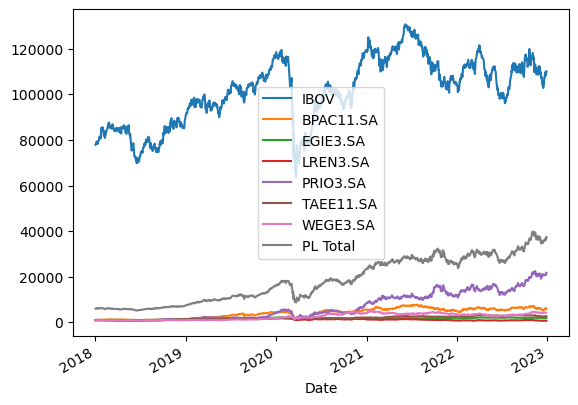

In [29]:
consolidado.plot()

In [30]:
#Comparando a carteira com o IBOV

In [31]:
consolidado_adj = consolidado/consolidado.iloc[0]

In [32]:
consolidado_adj.head()

,IBOV,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2018-01-02 00:00:00-02:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-03 00:00:00-02:00,1.001335,1.009524,0.993281,1.012730,1.018139,1.001398,0.984812,1.003314
2018-01-04 00:00:00-02:00,1.009706,1.013227,0.980403,1.018388,1.053365,0.985555,0.975220,1.004360
2018-01-05 00:00:00-02:00,1.015149,1.029980,0.985442,1.012164,1.112697,0.990214,0.979217,1.018286
2018-01-08 00:00:00-02:00,1.019104,1.042601,0.991041,1.007072,1.196957,0.985555,0.987211,1.035073


In [33]:
consolidado_adj.tail()

,IBOV,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2022-12-23 00:00:00-03:00,1.408353,6.130748,1.934140,0.752164,20.766531,2.678278,4.292349,6.092368
2022-12-26 00:00:00-03:00,1.396028,5.978105,1.917383,0.711943,20.737273,2.664428,4.257787,6.044487
2022-12-27 00:00:00-03:00,1.391008,5.837974,1.907227,0.700599,20.819194,2.636730,4.237719,6.023240
2022-12-28 00:00:00-03:00,1.415273,6.128246,1.920937,0.716412,21.796372,2.676739,4.314647,6.258892
2022-12-29 00:00:00-03:00,1.412628,5.988115,1.923476,0.704036,21.772966,2.662120,4.293464,6.224030


Text(0.5, 1.0, 'Carteira')

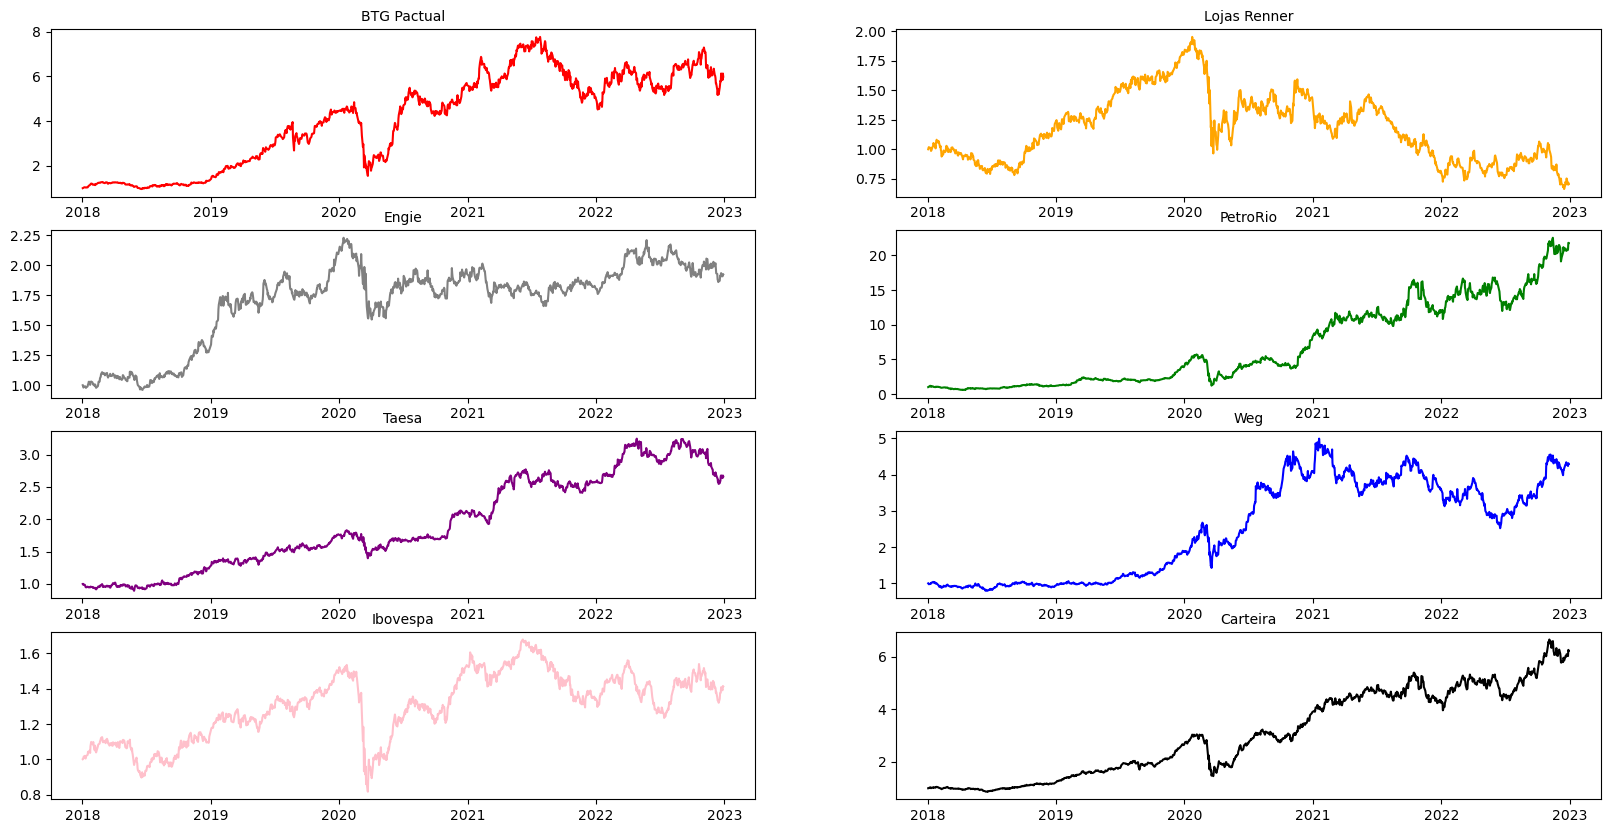

In [98]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=4, figsize=(20,10))
f1_axes[0,0].plot(consolidado_adj['BPAC11.SA'], color='red')
f1_axes[0,0].set_title('BTG Pactual',  fontsize = 10)
f1_axes[1,0].plot(consolidado_adj['EGIE3.SA'], color='gray')
f1_axes[1,0].set_title('Engie',  fontsize = 10)
f1_axes[0,1].plot(consolidado_adj['LREN3.SA'], color='orange')
f1_axes[0,1].set_title('Lojas Renner',  fontsize = 10)
f1_axes[1,1].plot(consolidado_adj['PRIO3.SA'], color='green')
f1_axes[1,1].set_title('PetroRio',  fontsize = 10)
f1_axes[2,0].plot(consolidado_adj['TAEE11.SA'], color='purple')
f1_axes[2,0].set_title('Taesa',  fontsize = 10)
f1_axes[2,1].plot(consolidado_adj['WEGE3.SA'], color='blue')
f1_axes[2,1].set_title('Weg',  fontsize = 10)
f1_axes[3,0].plot(consolidado_adj['IBOV'], color='pink')
f1_axes[3,0].set_title('Ibovespa',  fontsize = 10)
f1_axes[3,1].plot(consolidado_adj['PL Total'], color='black')
f1_axes[3,1].set_title('Carteira',  fontsize = 10)

<AxesSubplot:xlabel='Date'>

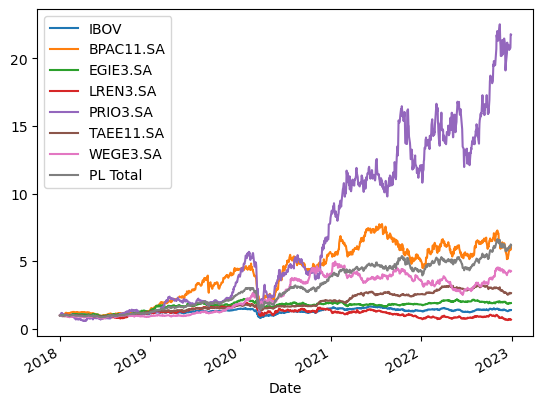

In [34]:
consolidado_adj.plot()

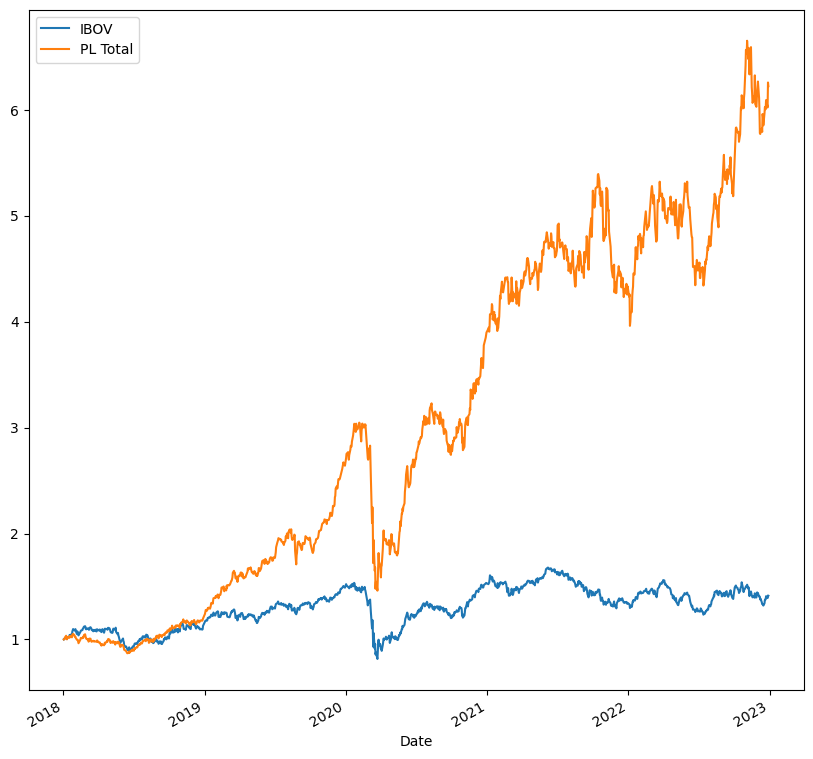

In [35]:
#minha carteira em relação ao ibov de 2018 a 2023
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (10,10));

In [83]:
# Total de retorno em cada ativo 

In [36]:
last_row = consolidado_adj.iloc[-1]
last_row = last_row - 1
last_row = last_row * 100

In [37]:
last_row

IBOV           41.262790
BPAC11.SA     498.811465
EGIE3.SA       92.347636
LREN3.SA      -29.596371
PRIO3.SA     2077.296622
TAEE11.SA     166.211994
WEGE3.SA      329.346399
PL Total      522.402958
Name: 2022-12-29 00:00:00-03:00, dtype: float64

In [38]:
valores = [41.26, 498.81, 92.34, -29.59, 2077.29, 166.21, 329.34, 522.40]
rotulos = ['IBOV', 'BPAC11', 'EGIE3', 'LREN3', 'PRIO3', 'TAEE11', 'WEGE3', 'PL Total']

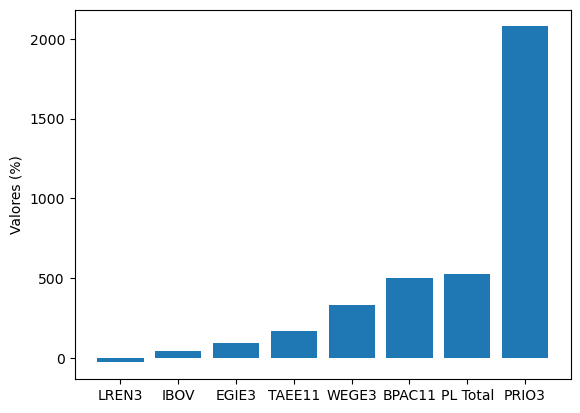

In [39]:
valores, rotulos = zip(*sorted(zip(valores, rotulos)))
plt.bar(range(len(valores)), valores)
plt.xticks(range(len(valores)), rotulos)
plt.ylabel('Valores (%)')
plt.show()

In [162]:
tickers = ['WEGE3.SA', 'LREN3.SA', 'BPAC11.SA', 'PRIO3.SA', 'EGIE3.SA', 'TAEE11.SA', '^BVSP']
valores = yf.download(tickers, start = inicio, end = fim)['Adj Close']
valores

[*********************100%***********************]  7 of 7 completed


,BPAC11.SA,EGIE3.SA,LREN3.SA,PRIO3.SA,TAEE11.SA,WEGE3.SA,^BVSP
Date,,,,,,,
2018-01-02 00:00:00-02:00,3.969408,19.693512,29.089409,1.709000,12.512256,8.969448,77891.0
2018-01-03 00:00:00-02:00,4.007212,19.561190,29.459711,1.740000,12.529747,8.833223,77995.0
2018-01-04 00:00:00-02:00,4.021914,19.307577,29.624296,1.800200,12.331509,8.747183,78647.0
2018-01-05 00:00:00-02:00,4.088411,19.406820,29.443254,1.901600,12.389814,8.783031,79071.0
2018-01-08 00:00:00-02:00,4.138508,19.517082,29.295134,2.045600,12.331509,8.854730,79379.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-03:00,24.335443,38.090000,21.879999,35.490002,33.511292,38.500000,109698.0
2022-12-26 00:00:00-03:00,23.729540,37.759998,20.709999,35.439999,33.338005,38.189999,108738.0
2022-12-27 00:00:00-03:00,23.173302,37.560001,20.379999,35.580002,32.991436,38.009998,108347.0


<AxesSubplot:>

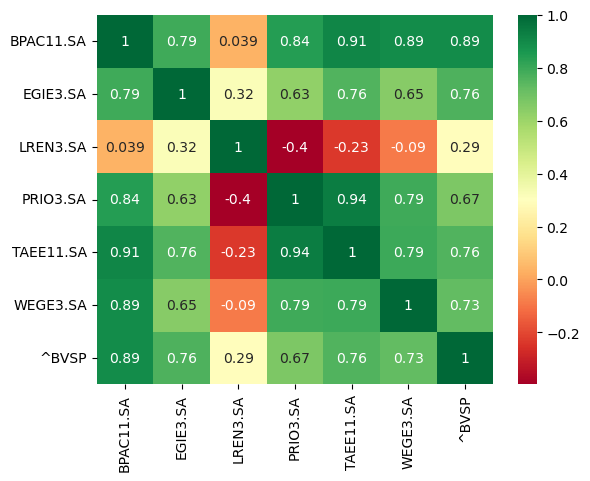

In [176]:
correlacao = valores.corr()
sns.heatmap(valores.corr(), annot=True, cmap='RdYlGn')

In [52]:
consolidado_adj.columns


Index(['IBOV', 'BPAC11.SA', 'EGIE3.SA', 'LREN3.SA', 'PRIO3.SA', 'TAEE11.SA',
       'WEGE3.SA', 'PL Total'],
      dtype='object')

In [ ]:
#Risco e volatilidade

In [ ]:
#Desvio Padrão

In [115]:
 consolidado_adj
media = consolidado_adj.mean()
n = consolidado_adj.count()
print (f'Média Ibov: {media[0]}        | Tamanho do conjunto: Ibov: {n[0]}')
print (f'Média BTG: {media[1]}          | Tamanho do conjunto: BTG: {n[1]}')
print (f'Média Engie: {media[2]}        | Tamanho do conjunto: Engie: {n[2]}')
print (f'Média Renner: {media[3]}      | Tamanho do conjunto: Renner: {n[3]}')
print (f'Média PetroRio: {media[4]}    | Tamanho do conjunto: PetroRio: {n[4]}')
print (f'Média Taesa: {media[5]}       | Tamanho do conjunto: Taesa: {n[5]}')
print (f'Média Weg: {media[4]}         | Tamanho do conjunto: Weg: {n[4]}')
print (f'Média Carteira: {media[5]}    | Tamanho do conjunto: Carteira: {n[5]}')

Média Ibov: 1.3036873076163404        | Tamanho do conjunto: Ibov: 1238
Média BTG: 4.098643624284228          | Tamanho do conjunto: BTG: 1238
Média Engie: 1.705713418127494        | Tamanho do conjunto: Engie: 1238
Média Renner: 1.1758007193249411      | Tamanho do conjunto: Renner: 1238
Média PetroRio: 6.9787725904519835    | Tamanho do conjunto: PetroRio: 1238
Média Taesa: 1.9283522715812342       | Tamanho do conjunto: Taesa: 1238
Média Weg: 6.9787725904519835         | Tamanho do conjunto: Weg: 1238
Média Carteira: 1.9283522715812342    | Tamanho do conjunto: Carteira: 1238


In [121]:
desviopadrao = (((consolidado_adj - media)**2).sum()/(n-1))**0.5
desviopadrao

IBOV         0.184662
BPAC11.SA    2.057424
EGIE3.SA     0.333675
LREN3.SA     0.286213
PRIO3.SA     6.025506
TAEE11.SA    0.711843
WEGE3.SA     1.331218
PL Total     1.639664
dtype: float64